In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp 
from sympy import *
import random
from scipy.linalg import expm
from sympy.physics.quantum import TensorProduct
import numpy as np 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
sp.init_printing()

In [3]:
#nomenculture like E01 ground energy of qubit 1 
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
I2 = sp.eye(2)
a_dag = sp.Matrix([[0,0],
                   [1,0]])
sigmap = sp.Matrix([[0,0],[1,0]])
sigmam=sigmap.T
#state of our reservior system 
qr1 = sp.Matrix([[E01,P1.conjugate()],
                 [P1,E11]])
#hamil of res, if more tensor of all
qrh = qr1
c1 = sp.Matrix([[E_01,0],[0,E_11]])
#hamilt of comp sys
ch = c1
#hamil of total system is thus
Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#can edit values here if need be
E01,E_11c, E_01c = (0,0,0)

ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
#just rewritting hamil with zero potential+gnd state
H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
#now to introduce coupling 
def MTP(A,B):
    return TensorProduct(A,B)
H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))


In [4]:
#basis vector representation & defining initial computational and reservoir qubits
#assuming QN in vacuum state

gnd_state = np.array([[1],[0]]) #the |0> state

phi_initial_g = np.array([[1],[0]]) #the |0> state for computational qubit
vac = np.array([[1],[0]]) #the |0> state for reservoir qubit
phi_initial_e = np.array([[0],[1]]) #the |1> state for computational qubit

exc_state = np.array([[0],[1]]) #the |1> state

In [5]:
H

D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDep

⎡       _____                 ⎤
⎢  0    P_{1}     0       0   ⎥
⎢                             ⎥
⎢P_{1}  E_{11}  J_{11}    0   ⎥
⎢                             ⎥
⎢       ______          _____ ⎥
⎢  0    J_{11}    0     P_{1} ⎥
⎢                             ⎥
⎣  0      0     P_{1}   E_{11}⎦

# I'm going through a phase, a relative phase

In [20]:
import cmath

In [83]:
def f(P=20,J=2,E=20,nsteps=3000):
    Hcopy = H
    E0 = 1 #variance of uniform distrib of energies E0
    P = P / E0
    J = J / E0
    #E = E * E0
    # for i in range(n):
    #     E = float(-E0/2 +(np.random.rand(1)*E0)) #onsite V for reservoir qubits
    #     E_array[i] =  E #check decimals => possible errors?
        # fix value of E
    Hamil = np.array(Hcopy.subs({"E_{11}":E,"P_{1}":P,
            "J_{11}":J})).astype('complex128') * 1/E0
    hbar = 1
    dt = 0.001 * E0/hbar
    nsteps = 3000 # think like total time your simulation run for
    T = nsteps  * dt #total time
    t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

    U = expm(-1j* Hamil * dt)

#     # z = x+iy
#     # x and y bewteen -1 and 1 exclusive
#     x1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#     y1 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#     z1 = complex(x1,y1)
#     i = 1
#     test0 = 0j
#     while i > 0:
#         x2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#         y2 = np.random.rand(1)*np.power(-1,np.random.randint(1,3))
#         z2 = complex(x2,y2)
#         if z2 == test0:
#             if z2==z1:
#                 continue
#         else: 
#             break 
            
    #constant z1, z2 values instead of changing with different
    #iteration of function, perhaps f(..,a), a = (x,y,x1,y1)
    x1=0.25
    y1=0.75
    x2=0.24
    y2=0.42
    z1=complex(x1,y1)
    z2=complex(x2,y2)

    phi_initial = z1*phi_initial_g + z2*phi_initial_e
    #the |phi_initial> (x)  |vac>_QN state = |psi_initial>    
    psi_initial = 1/np.sqrt(np.abs(z1)**2+np.abs(z2)**2) *(
                    MTP(phi_initial, vac) )
      


    a_array = np.zeros(len(t))
    b_array = np.zeros(len(t))
    c_array = np.zeros(len(t))
    d_array = np.zeros(len(t))
    a_complex_real = np.zeros(len(t))
    a_complex_imag = np.zeros(len(t))
    b_complex_real = np.zeros(len(t))
    b_complex_imag = np.zeros(len(t))
    c_complex_real = np.zeros(len(t))
    c_complex_imag = np.zeros(len(t))
    d_complex_real = np.zeros(len(t))
    d_complex_imag = np.zeros(len(t))
    phase_a= np.zeros(len(t))
    phase_b= np.zeros(len(t))
    phase_c= np.zeros(len(t))
    phase_d= np.zeros(len(t))
    k=0
    for i in range(len(t)):
        a_array[k] = np.abs(psi_initial[0][0])**2 #accessing 0th posn of vector 0
        b_array[k] = np.abs(psi_initial[1][0])**2
        c_array[k] = np.abs(psi_initial[2][0])**2
        d_array[k] = np.abs(psi_initial[3][0])**2 #accessing 3th posn of vector 0
        a_complex_real[k], a_complex_imag[k] =  psi_initial[0][0].real, psi_initial[0][0].imag
        b_complex_real[k], b_complex_imag[k] =  psi_initial[1][0].real, psi_initial[1][0].imag
        c_complex_real[k], c_complex_imag[k] =  psi_initial[2][0].real, psi_initial[2][0].imag
        d_complex_real[k], d_complex_imag[k] =  psi_initial[3][0].real, psi_initial[3][0].imag
        psi_initial = U @ psi_initial # U[0] with E[0] value
        phase_a[k]=cmath.phase(psi_initial[0][0])
        phase_b[k]=cmath.phase(psi_initial[1][0])
        phase_c[k]=cmath.phase(psi_initial[2][0])
        phase_d[k]=cmath.phase(psi_initial[3][0])#np.arctan(d_complex_imag[k]/d_complex_real[k])
        k+=1

    fig, axs = plt.subplots(4,2, figsize=(10,10))
    axs[0,0].plot(t, a_array, 'g', label = '|00>')
    axs[0,0].plot(t, phase_a, 'k', label ='phase(a)')
    axs[0,0].set_ylabel(f'|a|^2')
    axs[0,0].title.set_text('amplitude and phase')
    #axs.set_ylabel(f'|a|^2')
    axs[0,0].legend()
    axs[0,1].plot(t, a_array, 'g', label = '|00>')
    axs[0,1].plot(t, a_complex_real, 'b', label='real(a)')
    axs[0,1].plot(t, a_complex_imag, 'r',label='imag(a)')
    axs[0,1].title.set_text('amplitude with real and imag parts')
    axs[0,1].legend()
    #axs[0,0].set_title('prob distribution of state |00>')
    axs[1,0].plot(t, b_array, 'g', label = '|01>')
    axs[1,0].plot(t, phase_b, 'k', label ='phase(b)')
    axs[1,0].set_ylabel(f'|b|^2')
    axs[1,0].legend()
    axs[1,1].plot(t, b_array, 'g', label = '|01>')
    axs[1,1].plot(t, b_complex_real, 'b', label='real(b)')
    axs[1,1].plot(t, b_complex_imag, 'r',label='imag(b)')
    axs[1,1].legend()
    axs[2,0].plot(t, c_array, 'g', label = '|10>')
    axs[2,0].plot(t, phase_c, 'k', label ='phase(c)')
    axs[2,0].set_ylabel(f'|c|^2')
    axs[2,0].legend()
    axs[2,1].plot(t, c_array, 'g', label = '|10>')
    axs[2,1].plot(t, c_complex_real, 'b', label='real(c)')
    axs[2,1].plot(t, c_complex_imag, 'r',label='imag(c)')
    axs[2,1].legend()
    axs[3,0].plot(t, d_array, 'g', label = '|11>')
    axs[3,0].plot(t, phase_d, 'k', label ='phase(d)')
    axs[3,0].set_ylabel(f'|d|^2')
    axs[3,0].set_xlabel('time')
    axs[3,0].legend()
    axs[3,1].plot(t, d_array, 'g', label = '|11>')
    axs[3,1].plot(t, d_complex_real, 'b', label='real(d)')
    axs[3,1].plot(t, d_complex_imag, 'r',label='imag(d)')
    axs[3,1].set_xlabel('time')
    axs[3,1].legend()
    print('\n', f'P={P}',f'J={J}', f'E={E}',f'run time={T}')
    # for ax in axs.flat:
    #     ax.set(xlabel='time', ylabel='complex # squared')
    # # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax in axs.flat:
    #     ax.label_outer()
    # #plt.savefig('1_1withintialstate_00.jpg')


In [81]:
phase_a

array([-2.647659  , -2.64763276, -2.64757947, ..., -0.2287054 ,
       -0.19097563, -0.15075161])

In [44]:
phase_b

array([-1.63666595, -1.64666291, -1.65665783, ..., -0.15170564,
       -0.16500747, -0.17814554])

In [36]:
phase_b

array([        nan, -1.17420877, -1.19420657, ...,  1.76161511,
        1.73827924,  1.71517851])

In [25]:
np.arctan(3/2)


 P=10.0 J=100.0 E=20 run time=3.0


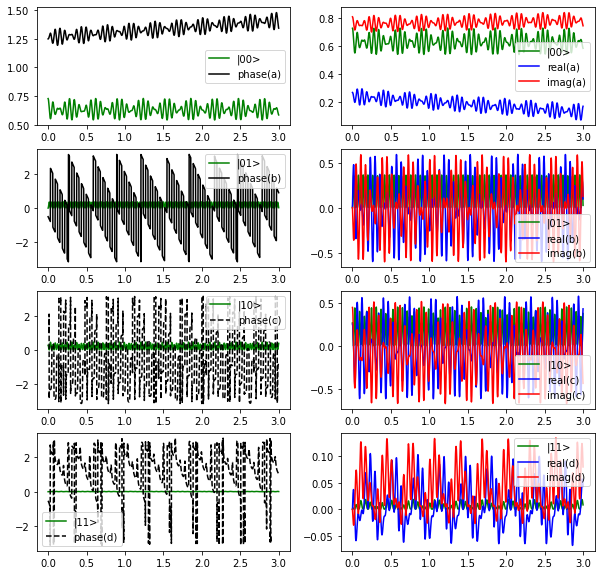

In [67]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=10,J=100)


 P=10.0 J=30.0 E=20 run time=3.0


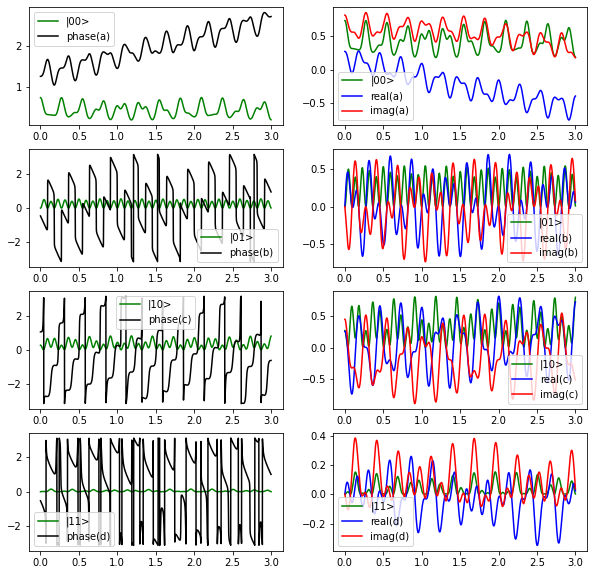

In [71]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=10,J=30)


 P=0.0 J=2.0 E=20 run time=3.0


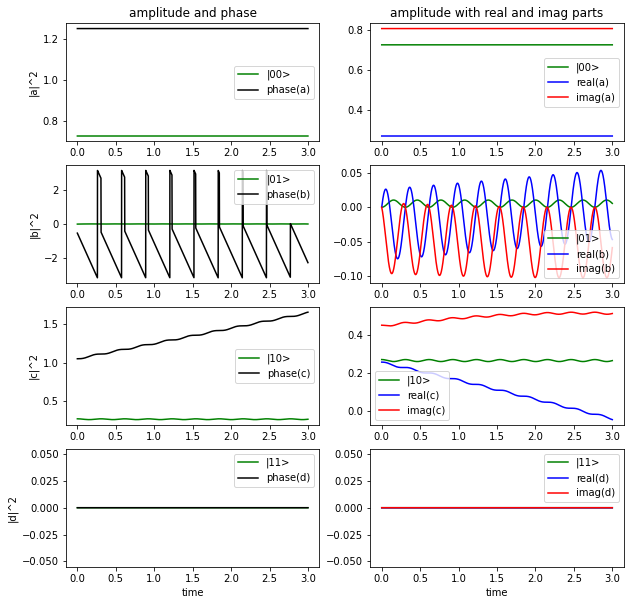

In [84]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=0,J=2)


 P=10.0 J=0.0 E=20 run time=3.0


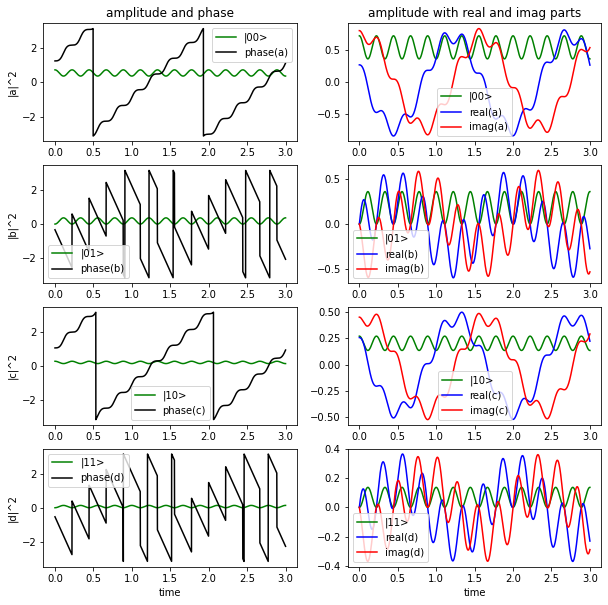

In [85]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=10,J=0)


 P=60.0 J=6.0 E=1 run time=3.0


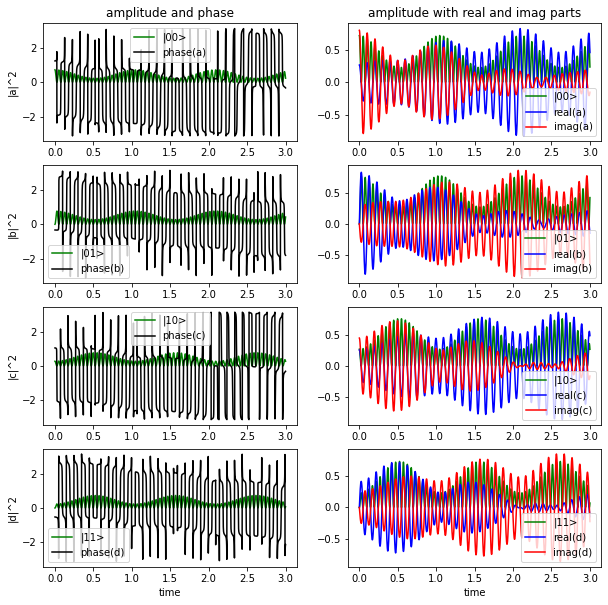

In [87]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=60,J=6,E=1)


 P=60.0 J=6.0 E=2 run time=3.0


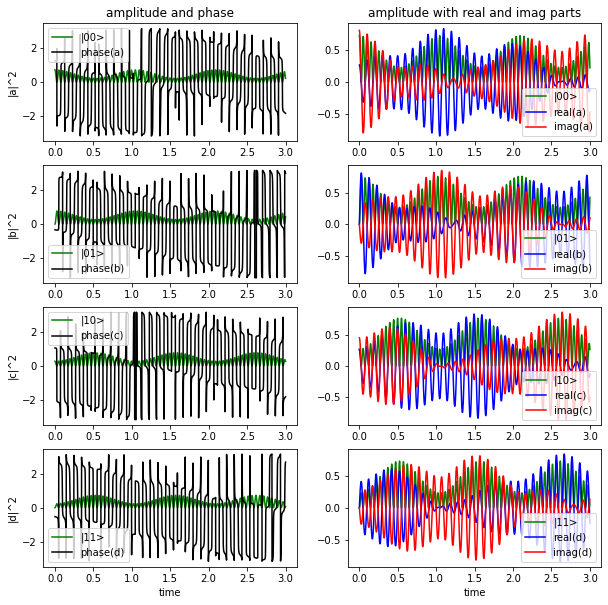

In [88]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=60,J=6,E=2)


 P=60.0 J=6.0 E=3 run time=3.0


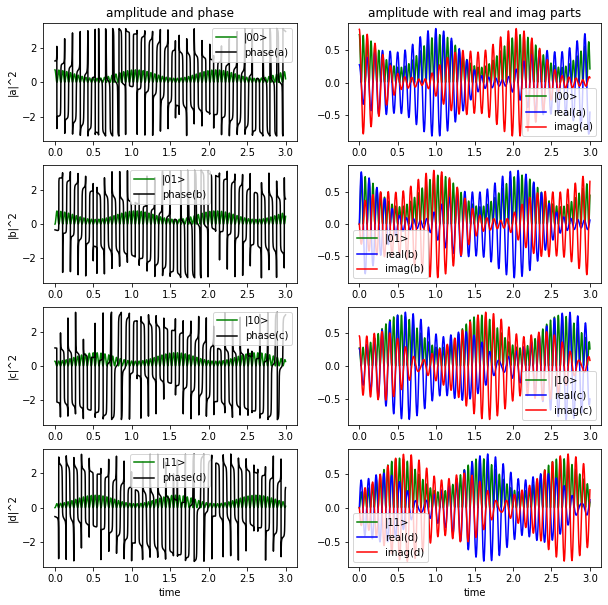

In [89]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=60,J=6,E=3)


 P=60.0 J=6.0 E=5 run time=3.0


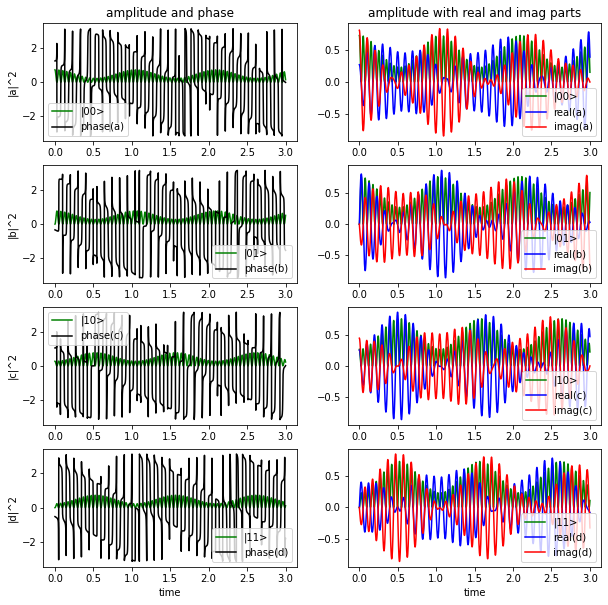

In [90]:
#f(P=20,J=2,E=20,nsteps=3000)
f(P=60,J=6,E=5)